In [ ]:
# kaggle.com/competitions/t16-tree-species-segmentation/overview

In [1]:
import numpy as np 
import pandas as pd
import torch 
from torch import nn 
from torch.utils.data import DataLoader,random_split,Dataset

In [3]:
from torchvision import transforms 

In [5]:
dataset = np.load('X_train.npy'); 
dataset[0]

array([[[0.08183995, 0.10536936, 0.05066371],
        [0.09327747, 0.11685063, 0.06187918],
        [0.09705842, 0.12255428, 0.06426034],
        ...,
        [0.21151458, 0.29693095, 0.18956137],
        [0.19602371, 0.29161999, 0.17582707],
        [0.19018007, 0.28786818, 0.17040534]],

       [[0.06590654, 0.08943747, 0.03922099],
        [0.07077048, 0.09503982, 0.0420747 ],
        [0.07599781, 0.10610082, 0.05035271],
        ...,
        [0.19116279, 0.28155949, 0.17652122],
        [0.20084354, 0.2935072 , 0.18231397],
        [0.19097519, 0.28244117, 0.16822836]],

       [[0.09050569, 0.11410153, 0.06695643],
        [0.06919628, 0.09595094, 0.04719557],
        [0.08519298, 0.12456065, 0.07093048],
        ...,
        [0.16274633, 0.25369954, 0.15384383],
        [0.18770707, 0.27905329, 0.1709873 ],
        [0.18835003, 0.27854937, 0.16530006]],

       ...,

       [[0.07533809, 0.14734672, 0.11540317],
        [0.0825245 , 0.1568558 , 0.12709263],
        [0.06465714, 0

In [29]:
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.ToTensor()]); 
transform

Compose(
    ToPILImage()
    ToTensor()
)

In [141]:
train_dataset = torch.zeros(80,3,512,512);

ERROR! Session/line number was not unique in

In [142]:
for i in range(len(dataset)):
    train_dataset[i] = transform(dataset[i])

ERROR! Session/line number was not unique in database. History logging moved to new session 339


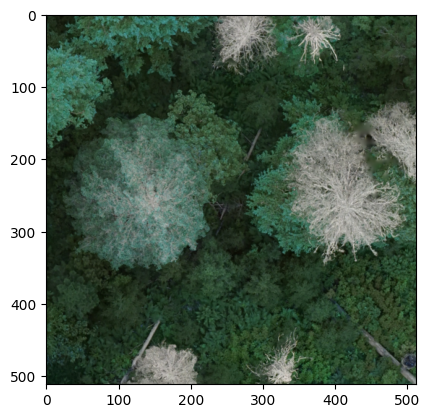

In [143]:
import matplotlib.pyplot as plt
npimg = train_dataset[0].numpy()
plt.imshow(np.transpose(npimg,(1,2,0)))

In [144]:
labels = np.load('y_train.npy'); 
labels = torch.tensor(labels,dtype = torch.int64)
labels[0]

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [101]:
labels.shape

torch.Size([80, 512, 512])

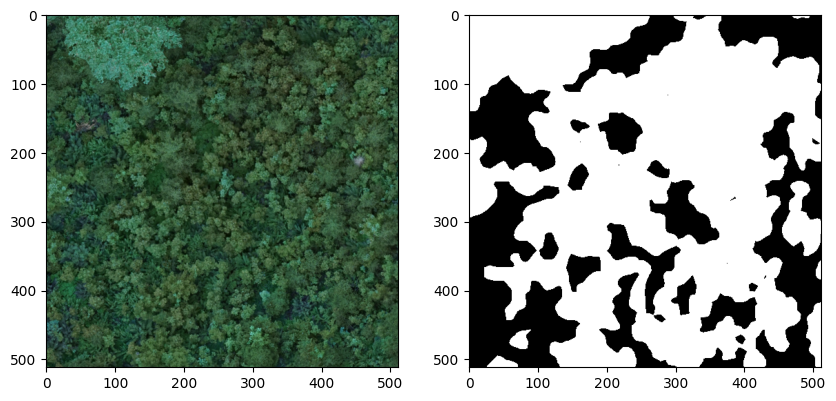

In [145]:
fig,ax = plt.subplots(1,2,figsize=(10,10));
npimg = np.transpose(train_dataset[10].numpy(),(1,2,0))
ax[0].imshow(npimg)
npimg = labels[10].numpy()
ax[1].imshow(npimg,cmap = 'gray'); 
plt.show()

In [46]:
from torch.utils.data import TensorDataset

In [146]:
train_dataset = TensorDataset(train_dataset,labels);

In [147]:
len(train_dataset)

80

In [148]:
train_dataset,val_dataset = random_split(train_dataset,[70,10]); 
train_loader = DataLoader(train_dataset,batch_size=1,shuffle=True); 
val_loader = DataLoader(val_dataset,batch_size=1,shuffle=False); 

In [60]:
from torchvision.models import resnet18,ResNet18_Weights

In [61]:
model1 = resnet18(weights=ResNet18_Weights);
model1

C:\Users\msadr\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\msadr/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|█████████████████████████████████████| 44.7M/44.7M [03:17<00:00, 237kB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [118]:
class DoubleConv(nn.Module): 
    def __init__(self,in_channel,out_channel): 
        super().__init__(); 
        self.network = nn.Sequential(nn.Conv2d(in_channel,out_channel,kernel_size=3,padding=1,stride=1),
                                    nn.BatchNorm2d(out_channel),nn.ReLU(),
                                    nn.Conv2d(out_channel,out_channel,kernel_size=3,padding=1,stride=1),
                                    nn.BatchNorm2d(out_channel),nn.ReLU())
    def forward(self, x):return self.network(x);

In [137]:
class Unet(nn.Module) :
  def __init__(self,in_channels,n_class,features = [64,128,256,512]) :
    super().__init__();
    self.downs = nn.ModuleList();
    self.ups = nn.ModuleList();
    self.maxpool = nn.MaxPool2d(kernel_size=2,stride=(2,2));
    for feature in features :
      self.downs.append(DoubleConv(in_channels,feature));
      in_channels = feature;
    for feature in reversed(features) :
      self.ups.append(nn.ConvTranspose2d(feature*2,feature,kernel_size=2,stride=2,padding =0));
      self.ups.append(DoubleConv(feature*2,feature));
    self.bottleneck = DoubleConv(features[-1],features[-1]*2);
    self.final_conv = nn.Conv2d(features[0],n_class,kernel_size=1,stride=1,padding=0);
  def forward(self,x) :
    skip_connections = [];
    for down in self.downs :
      x = down(x);
      skip_connections.append(x);
      x = self.maxpool(x);
    x = self.bottleneck(x);
    skip_connections = skip_connections[::-1];
    for i in range(0,len(self.ups),2) :
      x = self.ups[i](x);
      skip_connection = skip_connections[i//2];
      concat = torch.concat((skip_connection,x),dim = 1);
      x = self.ups[i+1](concat);
    x = self.final_conv(x);
    return x;

In [151]:
model = Unet(in_channels=3,n_class=2)
model

Unet(
  (downs): ModuleList(
    (0): DoubleConv(
      (network): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
      )
    )
    (1): DoubleConv(
      (network): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
      )
    )
    (2): DoubleConv(
      (network): Sequential(
        (0): Conv2d(1

In [150]:
for param in model.layer0.parameters() : param.requires_grad = False
for i in range(len(model.downs)): 
    for param in model.downs[i].parameters(): param.requires_grad = False

AttributeError: 'Unet' object has no attribute 'layer0'

In [154]:
optimizer = torch.optim.Adam(lr=2e-3,params=model.parameters()); 
loss_function = nn.CrossEntropyLoss()

In [155]:
b = 0; 
for i in range(3): 
    model.train() 
    for x, y in train_loader : 
        optimizer.zero_grad(); 
        out = model(x); 
        loss = loss_function(out,y); 
        loss.backward(); 
        optimizer.step(); 
        b+=1; 
        print(loss.item())

0.45802414417266846
0.5151163935661316
0.3505867123603821
0.3148026168346405
0.340507835149765
0.5684666633605957
0.35013481974601746
1.3911101818084717
0.31693679094314575
0.7937823534011841
0.5717913508415222
0.3162584900856018
0.3369561731815338
0.49044668674468994
0.32727327942848206
0.31617388129234314
0.31306514143943787
0.4955975115299225
0.4315410256385803
0.6465116739273071
0.3473997414112091
0.32446858286857605
0.3385235667228699
0.29849573969841003
0.32399988174438477
0.3327329158782959
0.28400787711143494


KeyboardInterrupt: 

In [163]:
y.squeeze(0).shape

torch.Size([512, 512])

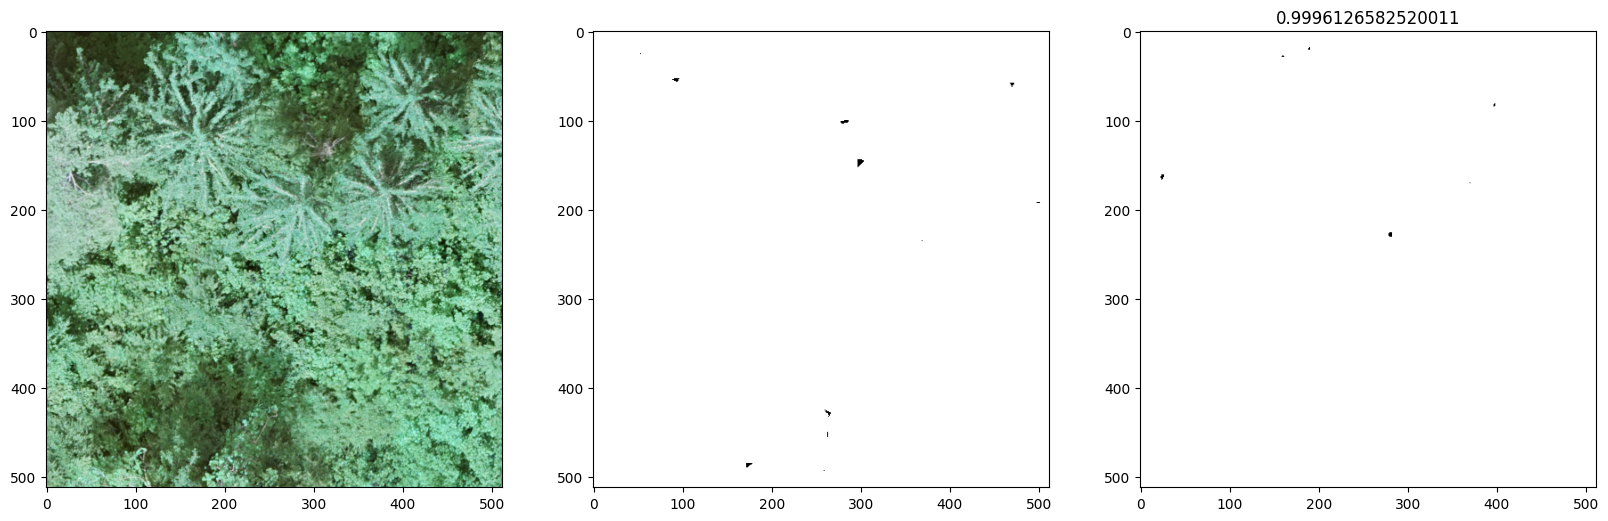

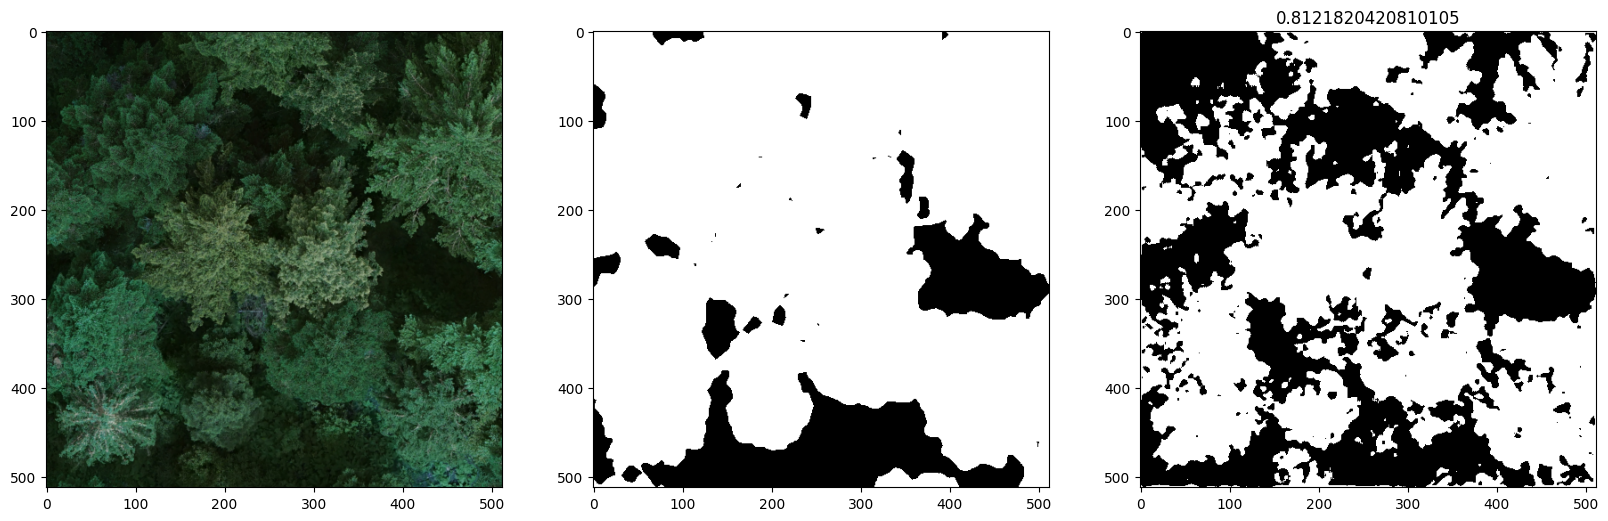

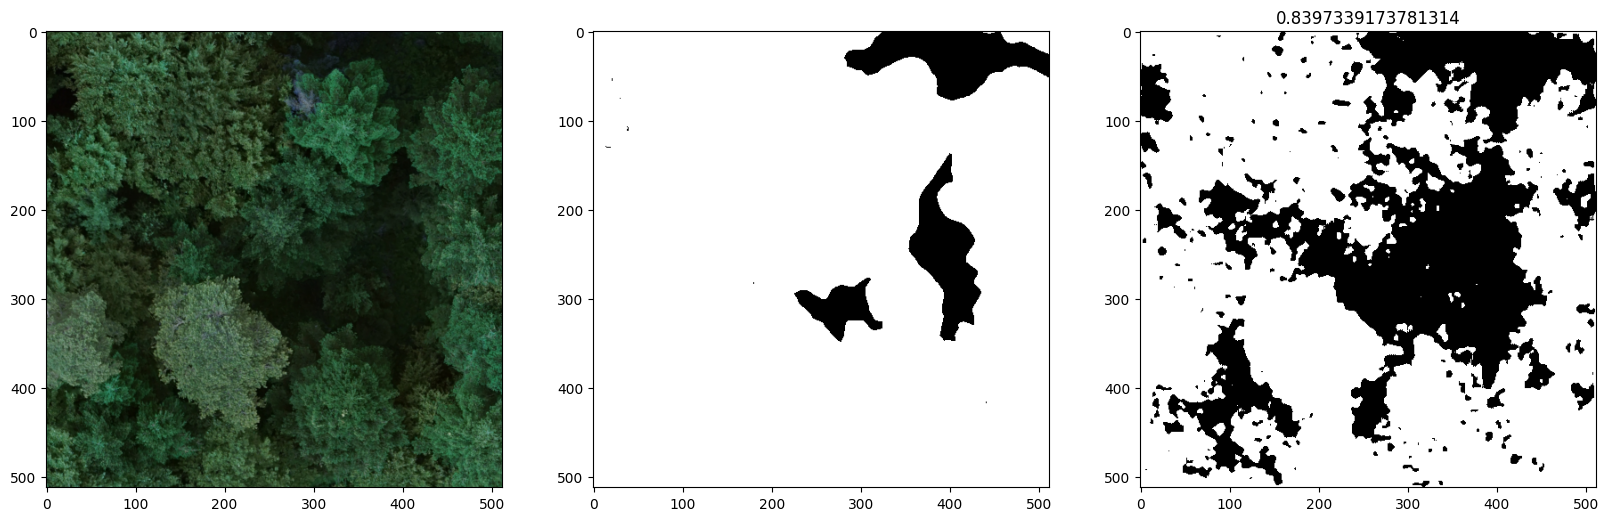

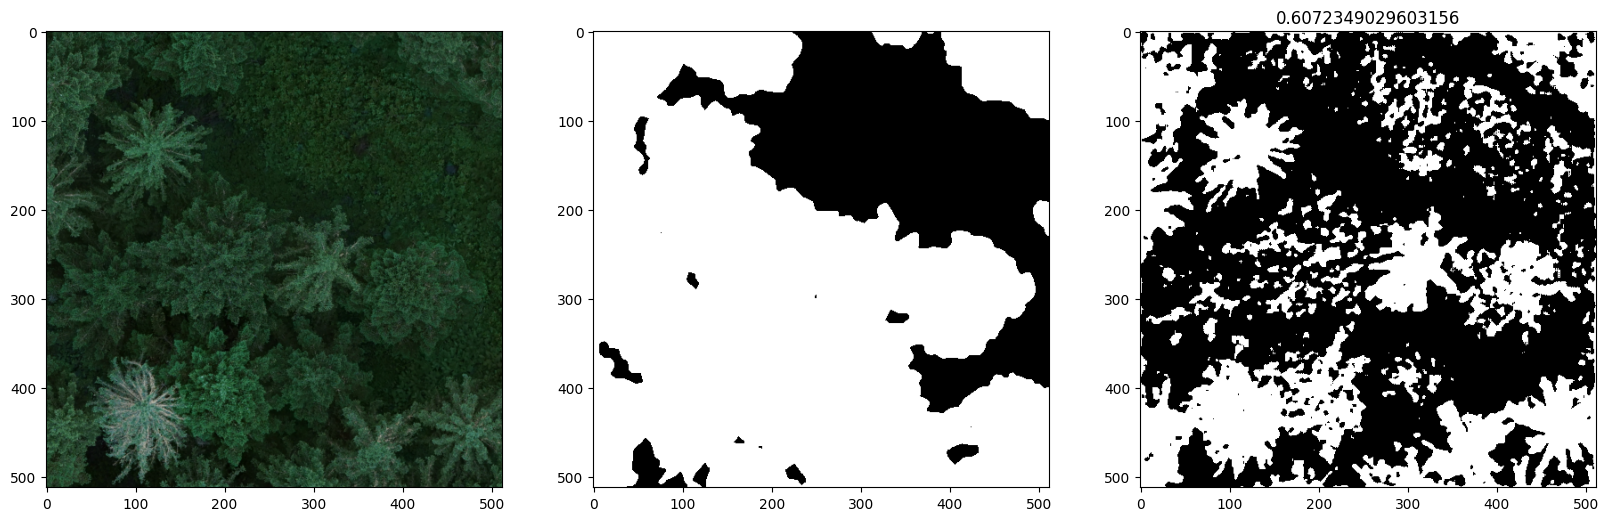

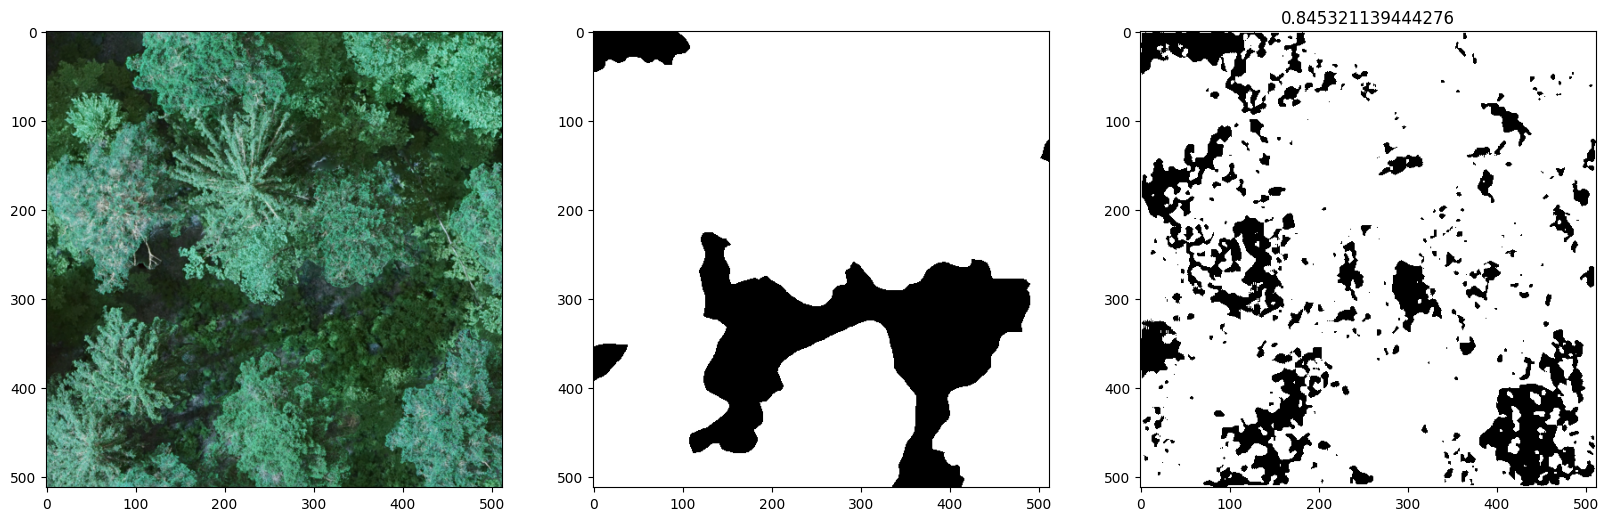

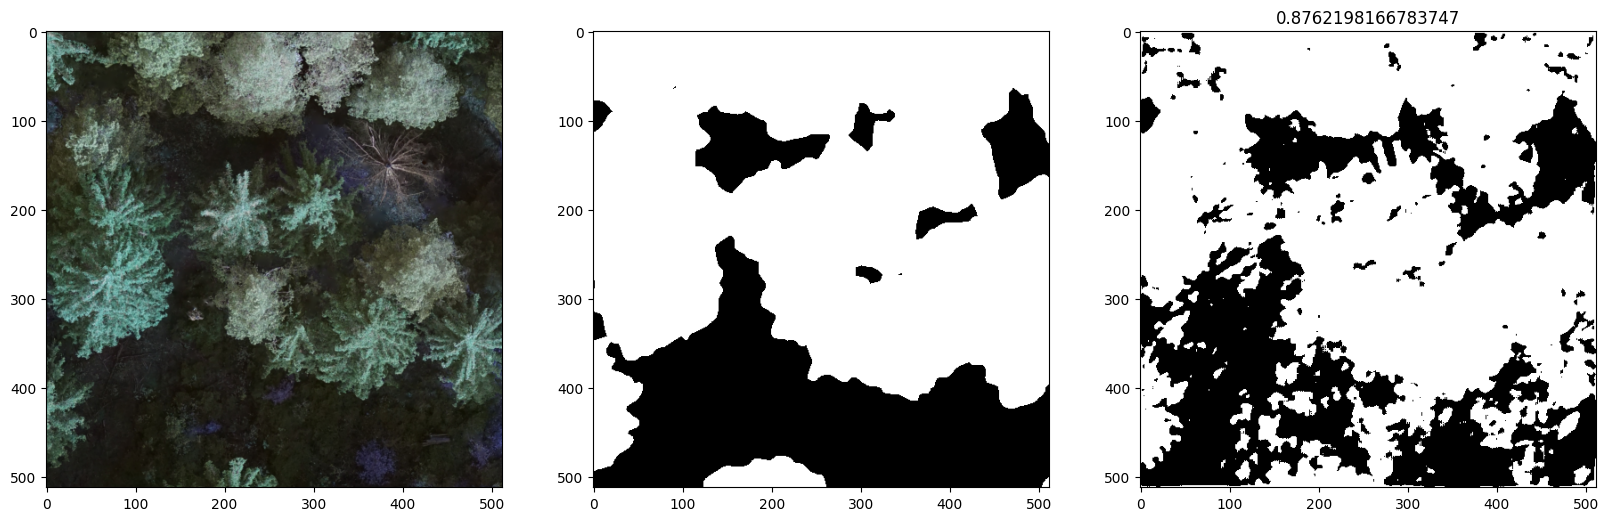

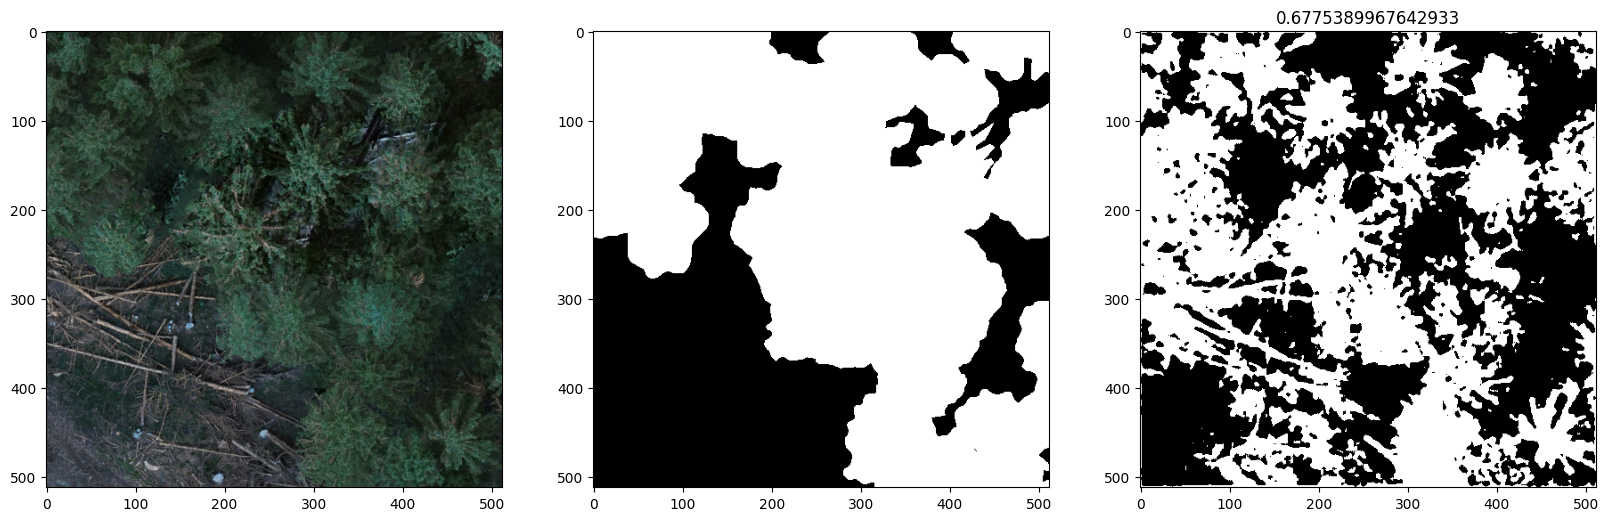

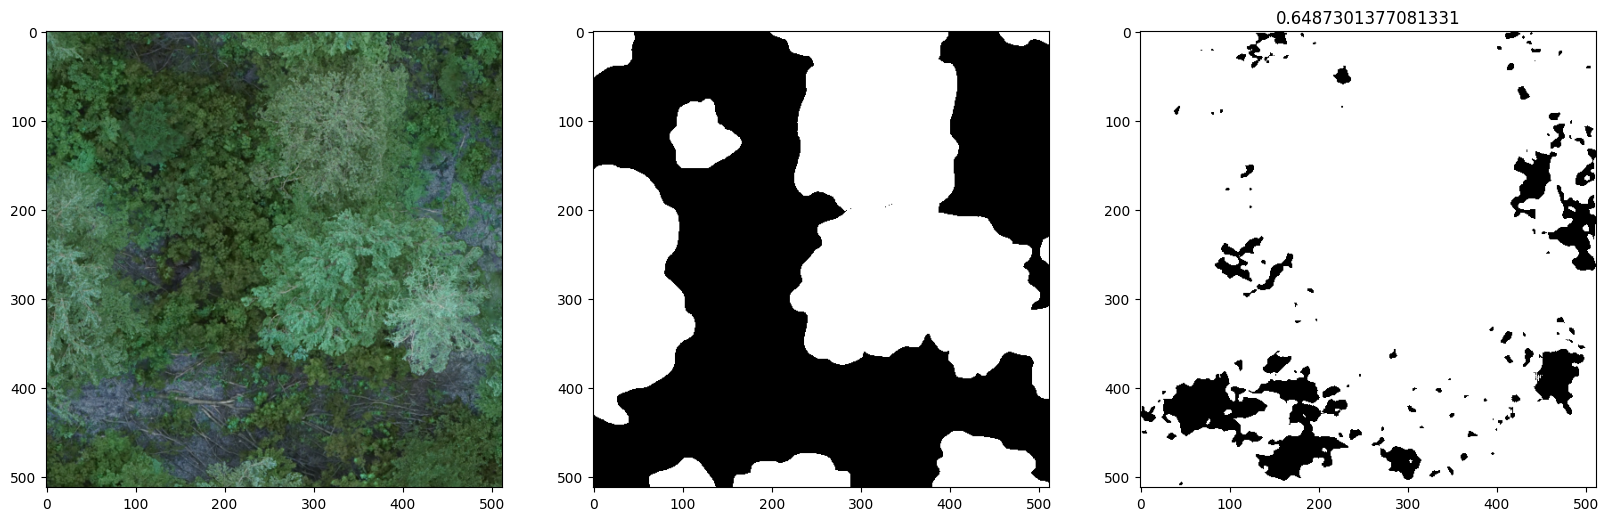

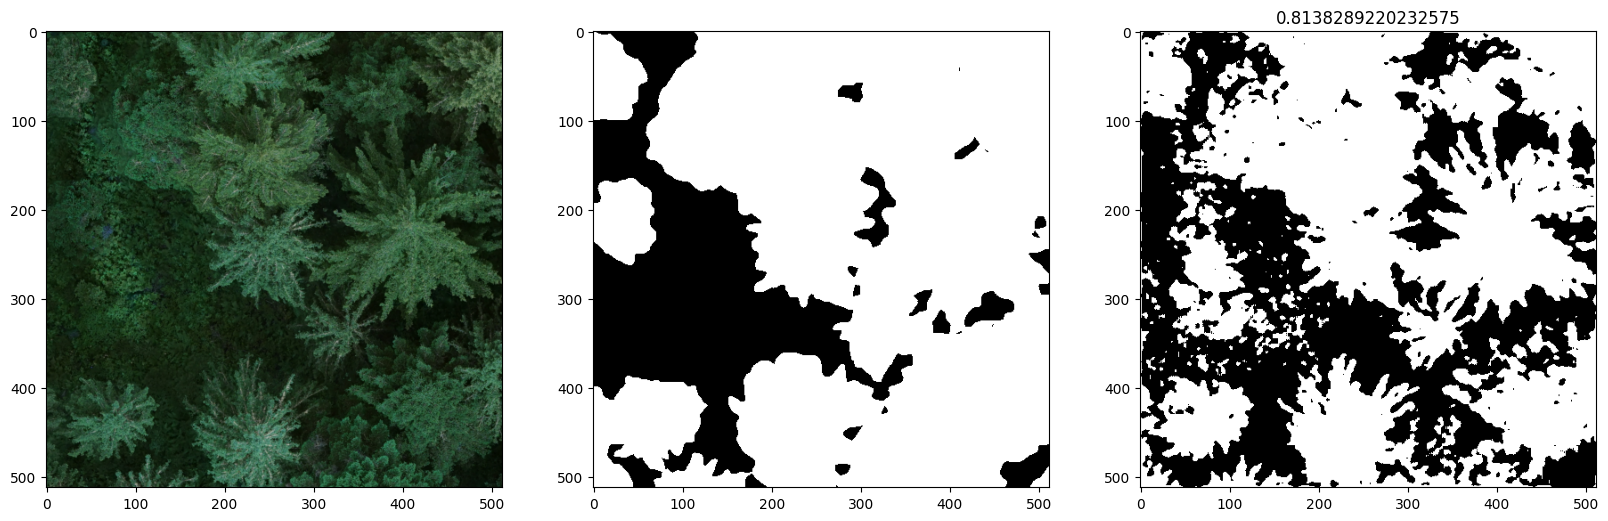

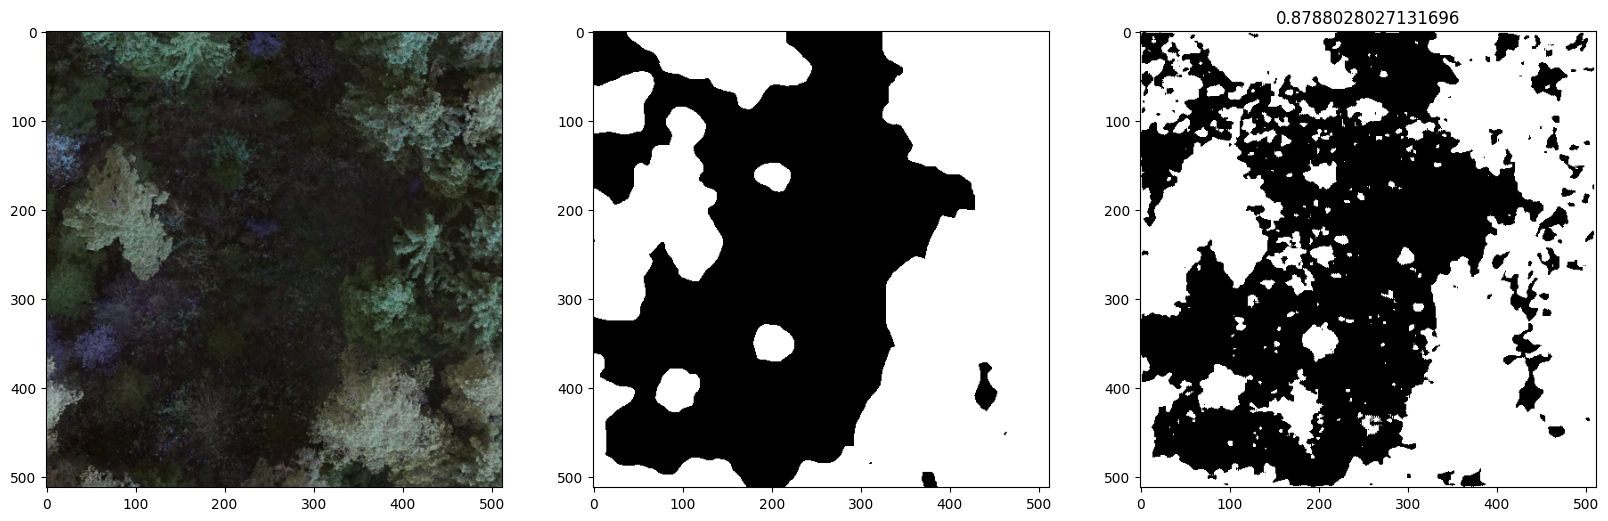

In [186]:
model.eval(); 
with torch.no_grad(): 
    for x, y in val_loader : 
        predict = model(x); 
        predict = predict.argmax(1).squeeze(0).numpy();
        y = y.squeeze(0).numpy() ;
        x = x.squeeze(0).numpy();
        fig,ax = plt.subplots(1,3,figsize=(20,20)); 
        ax[0].imshow(np.transpose(x,(1,2,0)));
        ax[1].imshow(y,cmap = 'gray'); 
        ax[2].imshow(predict,cmap='gray'); 
        ax[2].set_title(f'{((y*predict).sum()*2)/(y.sum()+predict.sum())}')
        plt.show()

In [170]:
train_dataset[0][0].shape

torch.Size([3, 512, 512])

In [176]:
model.eval(); 
with torch.no_grad(): 
    x = train_dataset[0][0].unsqueeze(0); 
    y = train_dataset[0][1].unsqueeze(0); 
    predict = model(x).argmax(1).squeeze(0); 
    y = y.squeeze(0); 
    x = x.squeeze(0);

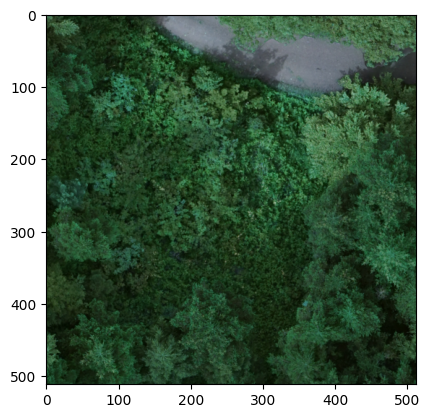

In [177]:
npimg = np.transpose(x.numpy(),(1,2,0))
plt.imshow(npimg)

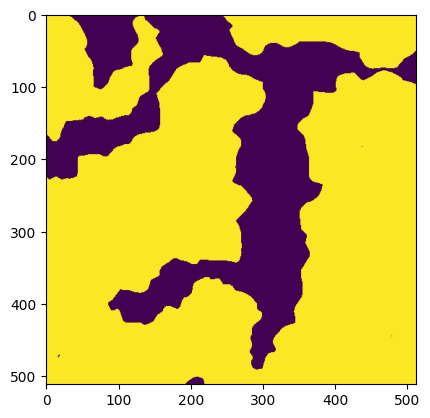

In [178]:
npimg = y.numpy()
plt.imshow(npimg)

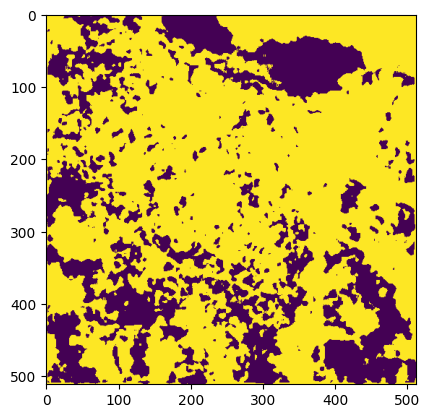

In [179]:
npimg = predict.numpy()
plt.imshow(npimg)

In [185]:
((y*predict).sum()*2)/(y.sum()+predict.sum())

tensor(0.6174)